C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\supakron\AppData\Local\Temp\ipykernel_20120\4027370635.py:62: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((age_fw, goal_fw), distances[0][i], color='gray', fill=False, linestyle='--', edgecolor='black', linewidth=1.5)


                Name               Club Position   Age  Goals
374  Anthony Martial  Manchester-United  Forward  24.0     51
375  Marcus Rashford  Manchester-United  Forward  22.0     44
457       Danny Ings        Southampton  Forward  28.0     45
403     Andy Carroll   Newcastle-United  Forward  31.0     53
488    Son Heung-Min  Tottenham-Hotspur  Forward  28.0     57


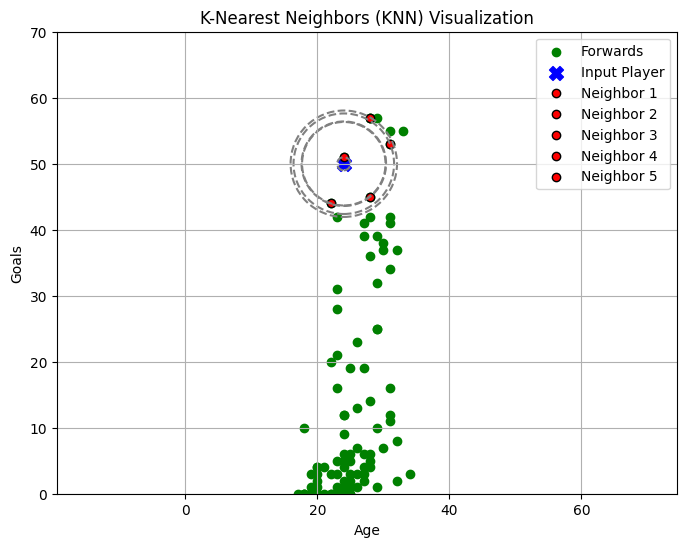

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors

# 1. โหลดข้อมูลจากไฟล์
data = pd.read_csv('../dataset/EPL-players-stats-2020.csv')

# 2. สร้างคอลัมน์ใหม่ 'Position Group' ให้มีแค่ 4 ตำแหน่งหลัก
def categorize_position(position):
    if position == 'Goalkeeper':
        return 'Goalkeeper'
    elif position == 'Defender':
        return 'Defender'
    elif position == 'Midfielder':
        return 'Midfielder'
    elif position == 'Forward':
        return 'Forward'
    else:
        return 'Unknown'

# 3. ใช้ฟังก์ชัน categorize_position กับคอลัมน์ 'Position'
data['Position Group'] = data['Position'].apply(categorize_position)

# 4. กรองข้อมูลเฉพาะนักเตะตำแหน่ง Forward
fw_data = data[data['Position Group'] == 'Forward']
fw_features = fw_data[['Name', 'Club', 'Position', 'Age', 'Goals']]

# 5. กำหนดโมเดล KNN
k = 5
knn_model = NearestNeighbors(n_neighbors=k)
knn_model.fit(fw_features[['Age', 'Goals']])

# 6. กำหนดค่าตัวอย่างของผู้เล่นที่ต้องการค้นหา
age_fw = 24
goal_fw = 50
input_player = [[age_fw, goal_fw]]

# ค้นหานักเตะที่ใกล้เคียงที่สุด
distances, indices = knn_model.kneighbors(input_player)

# ดึงนักเตะที่ใกล้เคียงที่สุด
similar_players = fw_features.iloc[indices[0]]

print(similar_players)

# 7. Plot กราฟ 2 มิติ (Age, Goals)
plt.figure(figsize=(8, 6))

# Plot จุดข้อมูลนักเตะ Forward ทุกคน
plt.scatter(fw_features['Age'], fw_features['Goals'], color='green', label='Forwards')

# Plot จุดนักเตะเป้าหมาย (input player)
plt.scatter(age_fw, goal_fw, color='blue', label='Input Player', marker='X', s=100)

# Plot เพื่อนบ้านที่ใกล้ที่สุด
for i in range(k):
    plt.scatter(similar_players.iloc[i]['Age'], similar_players.iloc[i]['Goals'], color='red', label=f'Neighbor {i+1}', edgecolor='black')

# เพิ่มวงกลมล้อมรอบเพื่อนบ้านที่ใกล้ที่สุด
for i in range(k):
    circle = plt.Circle((age_fw, goal_fw), distances[0][i], color='gray', fill=False, linestyle='--', edgecolor='black', linewidth=1.5)
    plt.gca().add_patch(circle)

# ตั้งค่าให้แกนมีสัดส่วนเท่ากันเพื่อให้วงกลมไม่แบน
plt.gca().set_aspect('equal', adjustable='datalim')

# จำกัดขอบเขตของแกน x และ y
plt.xlim(15, 40)  # อายุในช่วง 15 ถึง 40
plt.ylim(0, 70)   # จำนวนประตูในช่วง 0 ถึง 70

# ตกแต่งกราฟ
plt.title('K-Nearest Neighbors (KNN) Visualization')
plt.xlabel('Age')
plt.ylabel('Goals')
plt.legend(loc='upper right')
plt.grid(True)

# แสดงผลกราฟ
plt.show()
